In [71]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [72]:
df = pd.read_csv('input_ginis_ssp5.csv', skiprows=1, usecols=range(7),
                 names=['ISO3', 'year'] + ['SSP{}'.format(i) for i in range(1, 6)])

In [73]:
df.ISO3.unique()

array(['AUT', 'BLR', 'BEL', 'BOL', 'BRA', 'BGR', 'CAN', 'CHL', 'CHN',
       'COL', 'CRI', 'CZE', 'DNK', 'DOM', 'ECU', 'EST', 'FIN', 'FRA',
       'DEU', 'GRC', 'GTM', 'HUN', 'IND', 'IRL', 'ISR', 'ITA', 'JAM',
       'LTU', 'LUX', 'MLT', 'MEX', 'NLD', 'NZL', 'PAN', 'PER', 'PHL',
       'POL', 'PRT', 'SVK', 'ESP', 'THA', 'GBR', 'USA'], dtype=object)

In [74]:
df.head()

,ISO3,year,SSP1,SSP2,SSP3,SSP4,SSP5
0,AUT,2011,26.074261,26.069490,26.068783,26.066082,26.072668
1,AUT,2012,26.737581,26.804142,26.882103,26.910206,26.734562
2,AUT,2013,26.663389,26.807251,26.972239,27.031157,26.658817
3,AUT,2014,26.715080,26.942604,27.202990,27.292898,26.708954
4,AUT,2015,26.758347,27.075573,27.439514,27.560543,26.750635


# Values below Threshold

## Single Example

{'THA', 'ECU', 'NLD', 'BEL', 'LUX', 'MEX', 'FIN', 'POL', 'DEU', 'HUN', 'MLT', 'CHN', 'BLR', 'CRI', 'DNK', 'PHL', 'EST', 'FRA', 'AUT', 'BOL', 'ESP', 'CZE', 'LTU', 'GTM', 'PRT'}


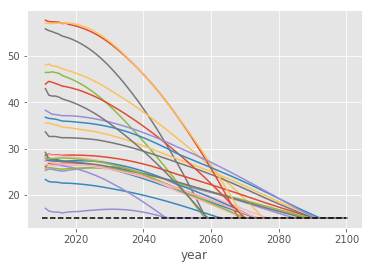

In [75]:
isos = set(df[(df['SSP1'] <= 15)]['ISO3'])
print(isos)
fig, ax = plt.subplots()
df.set_index(['ISO3', 'year']).sort_index().loc[list(isos)]['SSP1'].unstack(level=0).plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

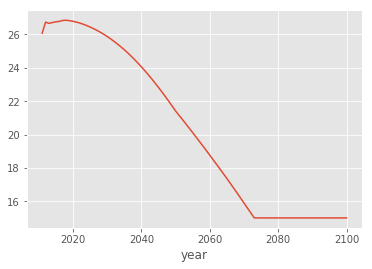

In [76]:
data = df.set_index(['ISO3', 'year']).loc['AUT']['SSP1']
data.plot()

In [77]:
cross_idx = np.where(data <= 15)[0][0]
cross_idx

63

In [78]:
def coeffs(x, y, i, l=15, dx=5):
    df_i = (y[i + dx] - y[i - dx]) / (x[i + dx] - x[i - dx])
    b = -df_i / (y[i] - l)
    a = (y[i] - l) * np.exp(b * x[i])
    return a, b

In [79]:
x = data.index.values
y = data.values
l = 15
i = cross_idx - 20
a, b = coeffs(x, y, i, l=l)
print(a, b)
f = lambda _: a * np.exp(-b * _) + l

1.0635547547450885e+45 0.049656741982872926


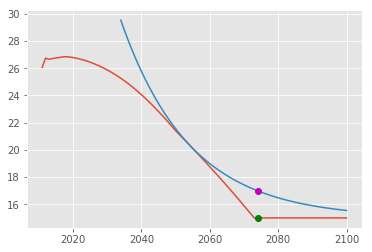

In [80]:
plt.plot(x, y, x[i - 20:], f(x[i - 20:]), x[cross_idx], y[cross_idx], 'go', x[cross_idx], f(x[cross_idx]), 'mo')

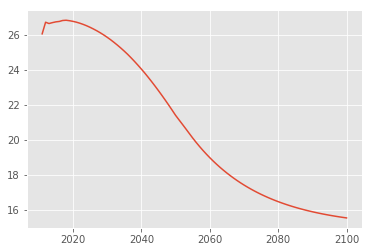

In [81]:
newy = np.append(y[:i], f(x)[i:])
plt.plot(x, newy)

## Apply to all

In [82]:
df.set_index(['ISO3', 'year']).head()

SSP1       SSP2       SSP3       SSP4       SSP5
ISO3 year                                                       
AUT  2011  26.074261  26.069490  26.068783  26.066082  26.072668
     2012  26.737581  26.804142  26.882103  26.910206  26.734562
     2013  26.663389  26.807251  26.972239  27.031157  26.658817
     2014  26.715080  26.942604  27.202990  27.292898  26.708954
     2015  26.758347  27.075573  27.439514  27.560543  26.750635

In [83]:
df2 = df.pivot('ISO3', 'year')
df2.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663389  26.715080  26.758347  26.782522   
BEL   28.349951  27.892925  27.666283  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726013   
BLR   25.279303  25.569714  25.520451  25.355469  25.220890  25.115076   
BOL   55.876625  55.509064  55.266956  55.004005  54.729530  54.316517   

                                                    ...          SSP5  \
year       2017       2018       2019       2020    ...          2091   
ISO3                                                ...                 
AUT   26.837683  26.851339  26.824461  26.787796    ...      15.00000   
BEL   27.265703  27.214397  27.118797  27.014381    ...      15.00000   
BGR   35.867489  36.125523  36.346970  36.556721    ...      33.94632   
BLR   25.215233  25.340946  25.435713  25.522364    ...      15.00000   
BOL   54.118164  53.882065  53.587025  53.252861    ...      15.00000   

                                                                      \
year       2092       2093     2094       2095       2096       2097   
ISO3                                                                   
AUT   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BEL   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BGR   33.950901  33.956638  33.9636  33.971748  33.987331  34.015739   
BLR   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BOL   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   

                                      
year      2098       2099       2100  
ISO3                                  
AUT   15.00000  15.000000  15.000000  
BEL   15.00000  15.000000  15.000000  
BGR   34.04565  34.077072  34.110031  
BLR   15.00000  15.000000  15.000000  
BOL   15.00000  15.000000  15.000000  

[5 rows x 450 columns]

In [84]:
df2['SSP1'].head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
ISO3,,,,,,,,,,,,,,,,,,,,,
AUT,26.074261,26.737581,26.663389,26.715080,26.758347,26.782522,26.837683,26.851339,26.824461,26.787796,...,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
BEL,28.349951,27.892925,27.666283,27.669338,27.500769,27.337940,27.265703,27.214397,27.118797,27.014381,...,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
BGR,36.120251,35.952427,35.914841,35.817028,35.779800,35.726013,35.867489,36.125523,36.346970,36.556721,...,29.873932,29.78166,29.689251,29.596771,29.504185,29.415249,29.338371,29.261564,29.184816,29.108177
BLR,25.279303,25.569714,25.520451,25.355469,25.220890,25.115076,25.215233,25.340946,25.435713,25.522364,...,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
BOL,55.876625,55.509064,55.266956,55.004005,54.729530,54.316517,54.118164,53.882065,53.587025,53.252861,...,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


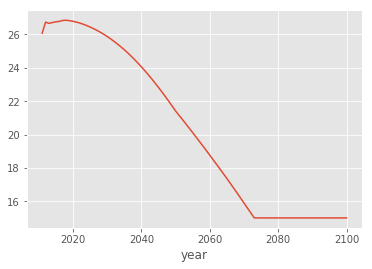

In [85]:
df2['SSP1'].loc['AUT'].plot()

In [86]:
def dy_dx(x, y, i, dx=5):
    return (y[i + dx] - y[i - dx]) / (x[i + dx] - x[i - dx])

def adj_below(data):
    l = 15
    if (data > l).all():
        return data
    
    cross_idx = np.where(data <= l)[0][0]
    x = data.index.values
    y = data.values
    i = cross_idx - 20 if dy_dx(x, y, cross_idx - 20) < 0  and cross_idx - 20 > 0 else cross_idx - 10
    assert(dy_dx(x, y, i) < 0) # must be 0
    a, b = coeffs(x, y, i, l=l)
    
    f = lambda _: a * np.exp(-b * _) + l
    return np.append(y[:i], f(x)[i:])

In [87]:
df3 = df2.copy()
df3['SSP1'].loc['AUT'] = adj_below(df3['SSP1'].loc['AUT'])

/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


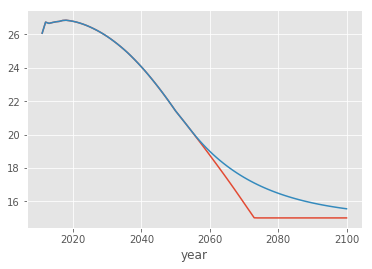

In [88]:
fig, ax = plt.subplots()
df2['SSP1'].loc['AUT'].plot(ax=ax)
df3['SSP1'].loc['AUT'].plot(ax=ax)

In [89]:
df4 = df2.copy()
for ssp in ['SSP{}'.format(i) for i in range(1, 2)]:
    print(ssp)
    for iso, row in df4[ssp].iterrows():
        df4[ssp].loc[iso] = adj_below(df4[ssp].loc[iso])

SSP1


/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [90]:
df4.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663389  26.715080  26.758347  26.782522   
BEL   28.349951  27.892925  27.666283  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726013   
BLR   25.279303  25.569714  25.520451  25.355469  25.220890  25.115076   
BOL   55.876625  55.509064  55.266956  55.004005  54.729530  54.316517   

                                                    ...          SSP5  \
year       2017       2018       2019       2020    ...          2091   
ISO3                                                ...                 
AUT   26.837683  26.851339  26.824461  26.787796    ...      15.00000   
BEL   27.265703  27.214397  27.118797  27.014381    ...      15.00000   
BGR   35.867489  36.125523  36.346970  36.556721    ...      33.94632   
BLR   25.215233  25.340946  25.435713  25.522364    ...      15.00000   
BOL   54.118164  53.882065  53.587025  53.252861    ...      15.00000   

                                                                      \
year       2092       2093     2094       2095       2096       2097   
ISO3                                                                   
AUT   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BEL   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BGR   33.950901  33.956638  33.9636  33.971748  33.987331  34.015739   
BLR   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   
BOL   15.000000  15.000000  15.0000  15.000000  15.000000  15.000000   

                                      
year      2098       2099       2100  
ISO3                                  
AUT   15.00000  15.000000  15.000000  
BEL   15.00000  15.000000  15.000000  
BGR   34.04565  34.077072  34.110031  
BLR   15.00000  15.000000  15.000000  
BOL   15.00000  15.000000  15.000000  

[5 rows x 450 columns]

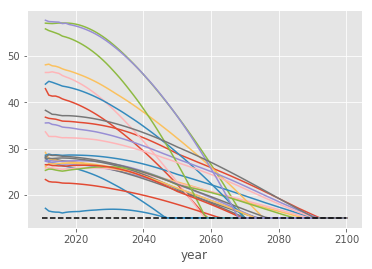

In [91]:
fig, ax = plt.subplots()
df2.loc[list(isos)]['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

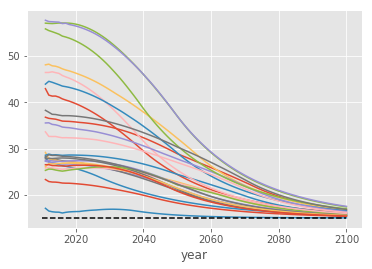

In [92]:
fig, ax = plt.subplots()
df4.loc[list(isos)]['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

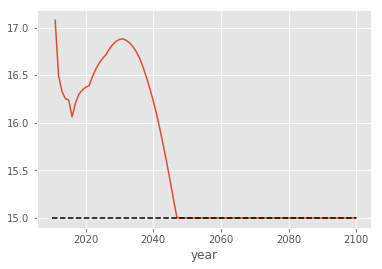

In [93]:
# LTU is special here, because it goes up at cross_idx - 20
fig, ax = plt.subplots()
df2.loc['LTU']['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')

# Values above Threshold

{'BRA', 'JAM', 'CHL', 'BGR', 'DOM', 'PER', 'SVK', 'GTM', 'BLR', 'USA', 'CAN', 'IND', 'COL'}


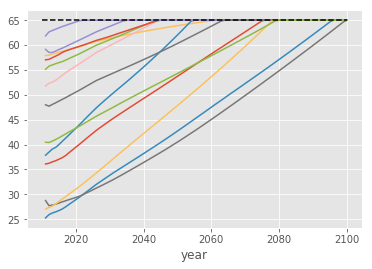

In [94]:
isos = set(df[(df['SSP4'] >= 65)]['ISO3'])
print(isos)
fig, ax = plt.subplots()
df.set_index(['ISO3', 'year']).sort_index().loc[list(isos)]['SSP4'].unstack(level=0).plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [65] * 1000, 'k--')

In [102]:
def adj_above(data):
    l = 65
    if (data < l).all():
        return data
    
    cross_idx = np.where(data >= l)[0][0]
    x = data.index.values
    y = data.values
    i = cross_idx - 20 if dy_dx(x, y, cross_idx - 20) > 0 and cross_idx - 20 > 0 else cross_idx - 10
    assert(dy_dx(x, y, i) > 0) # must be 0
    a, b = coeffs(x, y, i, l=l)
    
    f = lambda _: a * np.exp(-b * _) + l
    return np.append(y[:i], f(x)[i:])

## Just for One

/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


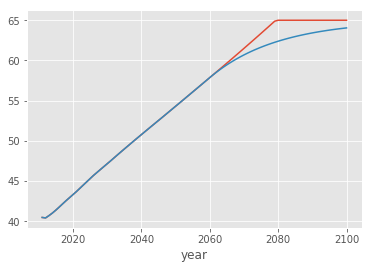

In [103]:
df3['SSP4'].loc['USA'] = adj_above(df3['SSP4'].loc['USA'])
fig, ax = plt.subplots()
df2['SSP4'].loc['USA'].plot(ax=ax)
df3['SSP4'].loc['USA'].plot(ax=ax)

## Now for All

In [104]:
for ssp in ['SSP{}'.format(i) for i in range(3, 4)]:
    print(ssp)
    for iso, row in df4[ssp].iterrows():
        df4[ssp].loc[iso] = adj_above(df4[ssp].loc[iso])

SSP3


/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


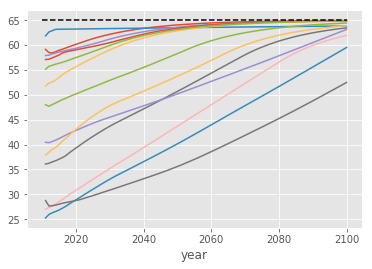

In [105]:
fig, ax = plt.subplots()
df4.loc[list(isos)]['SSP3'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [65] * 1000, 'k--')

# Do all Adjustments and Save

In [107]:
df5 = df2.copy()

for ssp in ['SSP{}'.format(i) for i in range(1, 6)]:
    print(ssp)
    for iso, row in df5[ssp].iterrows():
        df5[ssp].loc[iso] = adj_below(df5[ssp].loc[iso])
        df5[ssp].loc[iso] = adj_above(df5[ssp].loc[iso])

SSP1


/home/gidden/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/gidden/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


SSP2
SSP3
SSP4
SSP5


In [108]:
df5.head()

SSP1                                                         \
year       2011       2012       2013       2014       2015       2016   
ISO3                                                                     
AUT   26.074261  26.737581  26.663389  26.715080  26.758347  26.782522   
BEL   28.349951  27.892925  27.666283  27.669338  27.500769  27.337940   
BGR   36.120251  35.952427  35.914841  35.817028  35.779800  35.726013   
BLR   25.279303  25.569714  25.520451  25.355469  25.220890  25.115076   
BOL   55.876625  55.509064  55.266956  55.004005  54.729530  54.316517   

                                                    ...           SSP5  \
year       2017       2018       2019       2020    ...           2091   
ISO3                                                ...                  
AUT   26.837683  26.851339  26.824461  26.787796    ...      15.722750   
BEL   27.265703  27.214397  27.118797  27.014381    ...      15.574725   
BGR   35.867489  36.125523  36.346970  36.556721    ...      33.946320   
BLR   25.215233  25.340946  25.435713  25.522364    ...      16.428362   
BOL   54.118164  53.882065  53.587025  53.252861    ...      18.007695   

                                                                        \
year       2092       2093       2094       2095       2096       2097   
ISO3                                                                     
AUT   15.687121  15.653248  15.621045  15.590430  15.561323  15.533652   
BEL   15.544750  15.516338  15.489407  15.463882  15.439687  15.416755   
BGR   33.950901  33.956638  33.963600  33.971748  33.987331  34.015739   
BLR   16.355499  16.286352  16.220733  16.158461  16.099366  16.043285   
BOL   17.894362  17.785299  17.680346  17.579347  17.482155  17.388624   

                                       
year       2098       2099       2100  
ISO3                                   
AUT   15.507345  15.482334  15.458557  
BEL   15.395019  15.374416  15.354888  
BGR   34.045650  34.077072  34.110031  
BLR   15.990065  15.939560  15.891631  
BOL   17.298618  17.212004  17.128653  

[5 rows x 450 columns]

In [109]:
assert((df5 < 65).all(axis=0).all())
assert((df5 > 15).all(axis=0).all())

In [110]:
df5.to_csv('adjusted.csv')

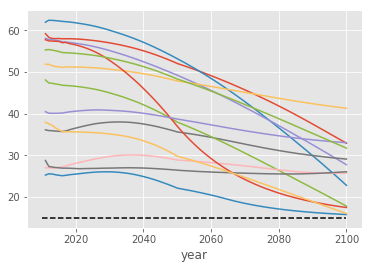

In [111]:
fig, ax = plt.subplots()
df5.loc[list(isos)]['SSP1'].T.plot(legend=False, ax=ax)
ax.plot(np.linspace(2010, 2100, 1000), [15] * 1000, 'k--')